### importing Liberaries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import logging

### load data

In [7]:
df = pd.read_csv("database SFRC.csv")

### EDA _Exploratory data Analysis

In [8]:
df.head(8)

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.4875,565.0,0.75,112.9500
1,251.0,150.0,25.3,0.0267,3.0876,0.4875,565.0,0.75,79.0650
2,251.0,150.0,27.9,0.0267,3.0876,0.6500,565.0,1.00,109.1850
3,251.0,150.0,26.2,0.0267,3.0876,0.6500,565.0,1.00,123.4920
4,251.0,150.0,28.1,0.0267,3.0876,0.9750,565.0,1.50,111.0675
5,251.0,150.0,27.3,0.0267,3.0876,0.9750,565.0,1.50,131.0220
6,251.0,150.0,27.5,0.0267,3.0876,0.4000,565.0,0.50,64.7580
7,251.0,150.0,24.9,0.0267,3.0876,0.4000,565.0,0.50,77.1825


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   d(mm)    488 non-null    float64
 1   B(mm)    488 non-null    float64
 2   fc(Mpa)  488 non-null    float64
 3   Rr       488 non-null    float64
 4   av/d     488 non-null    float64
 5   F        488 non-null    float64
 6   fy(Mpa)  488 non-null    float64
 7   vf%      488 non-null    float64
 8   Vu (KN)  488 non-null    float64
dtypes: float64(9)
memory usage: 34.4 KB


In [5]:
# Check the missing Values
df.isnull().sum()

d(mm)      0
B(mm)      0
fc(Mpa)    0
Rr         0
av/d       0
F          0
fy(Mpa)    0
vf%        0
Vu (KN)    0
dtype: int64

### Visualization

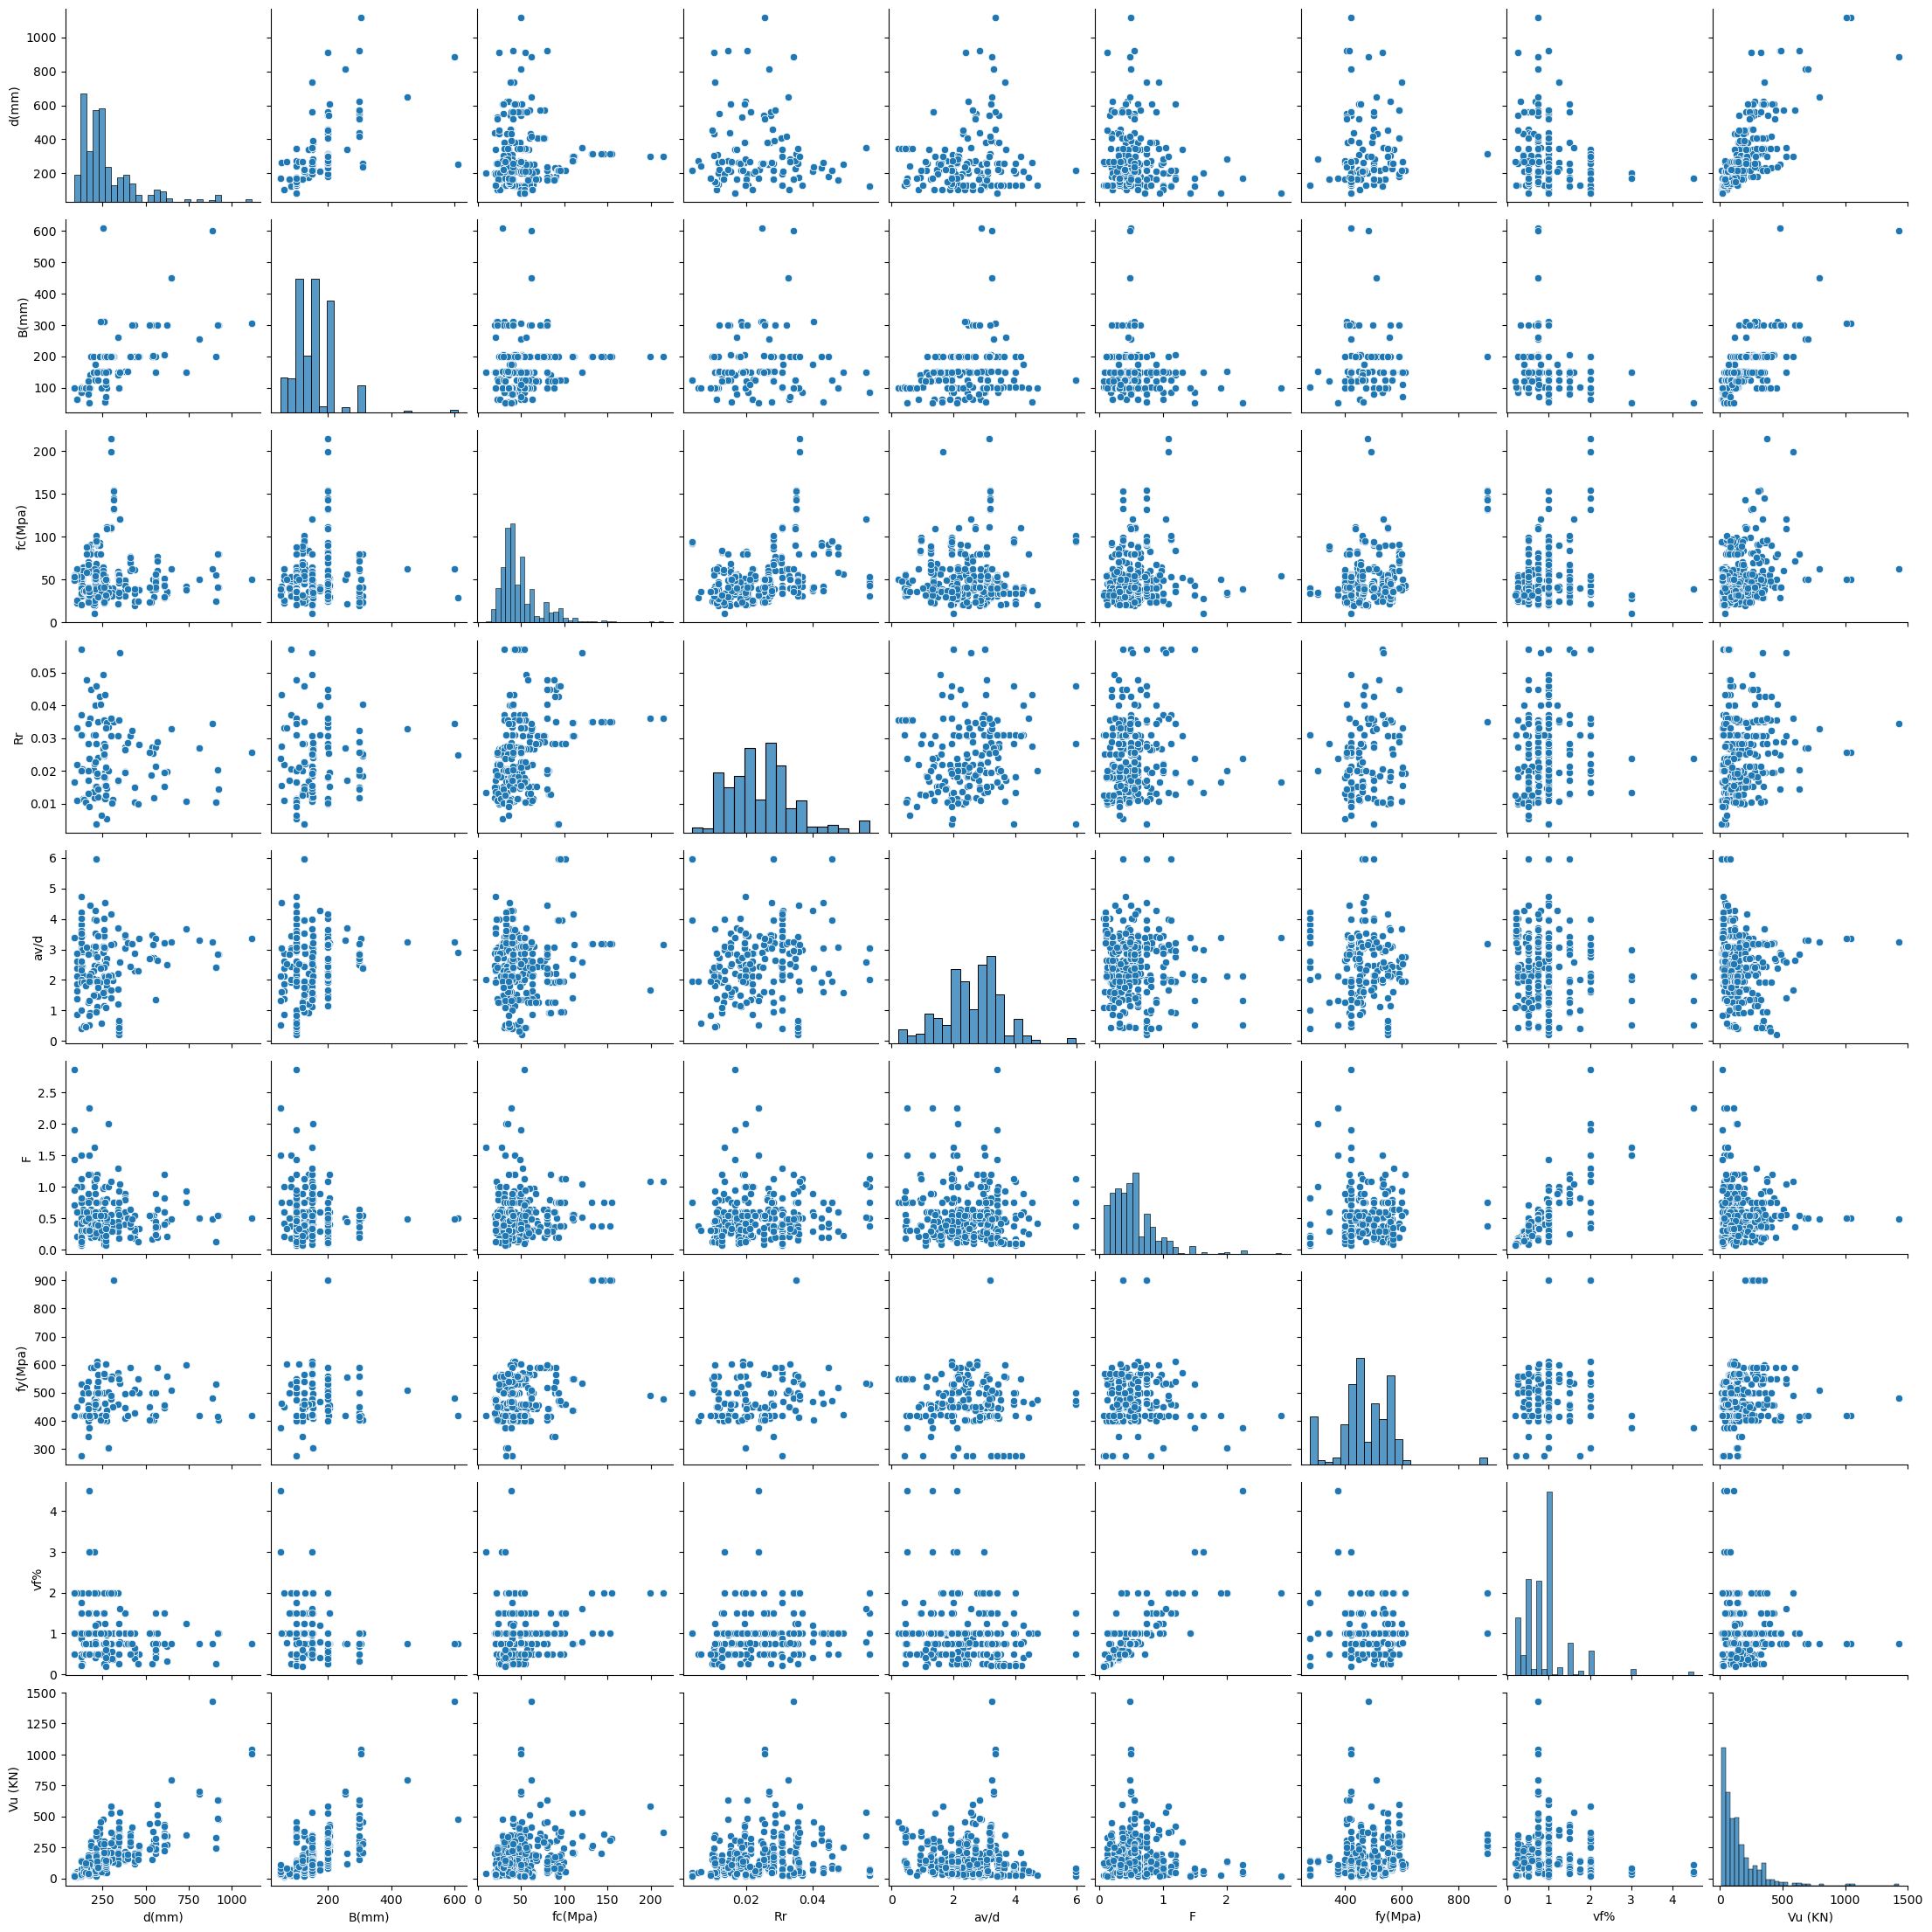

In [6]:
 # Visualize the data using seaborn Pairplots
sns.pairplot(df)
plt.show()

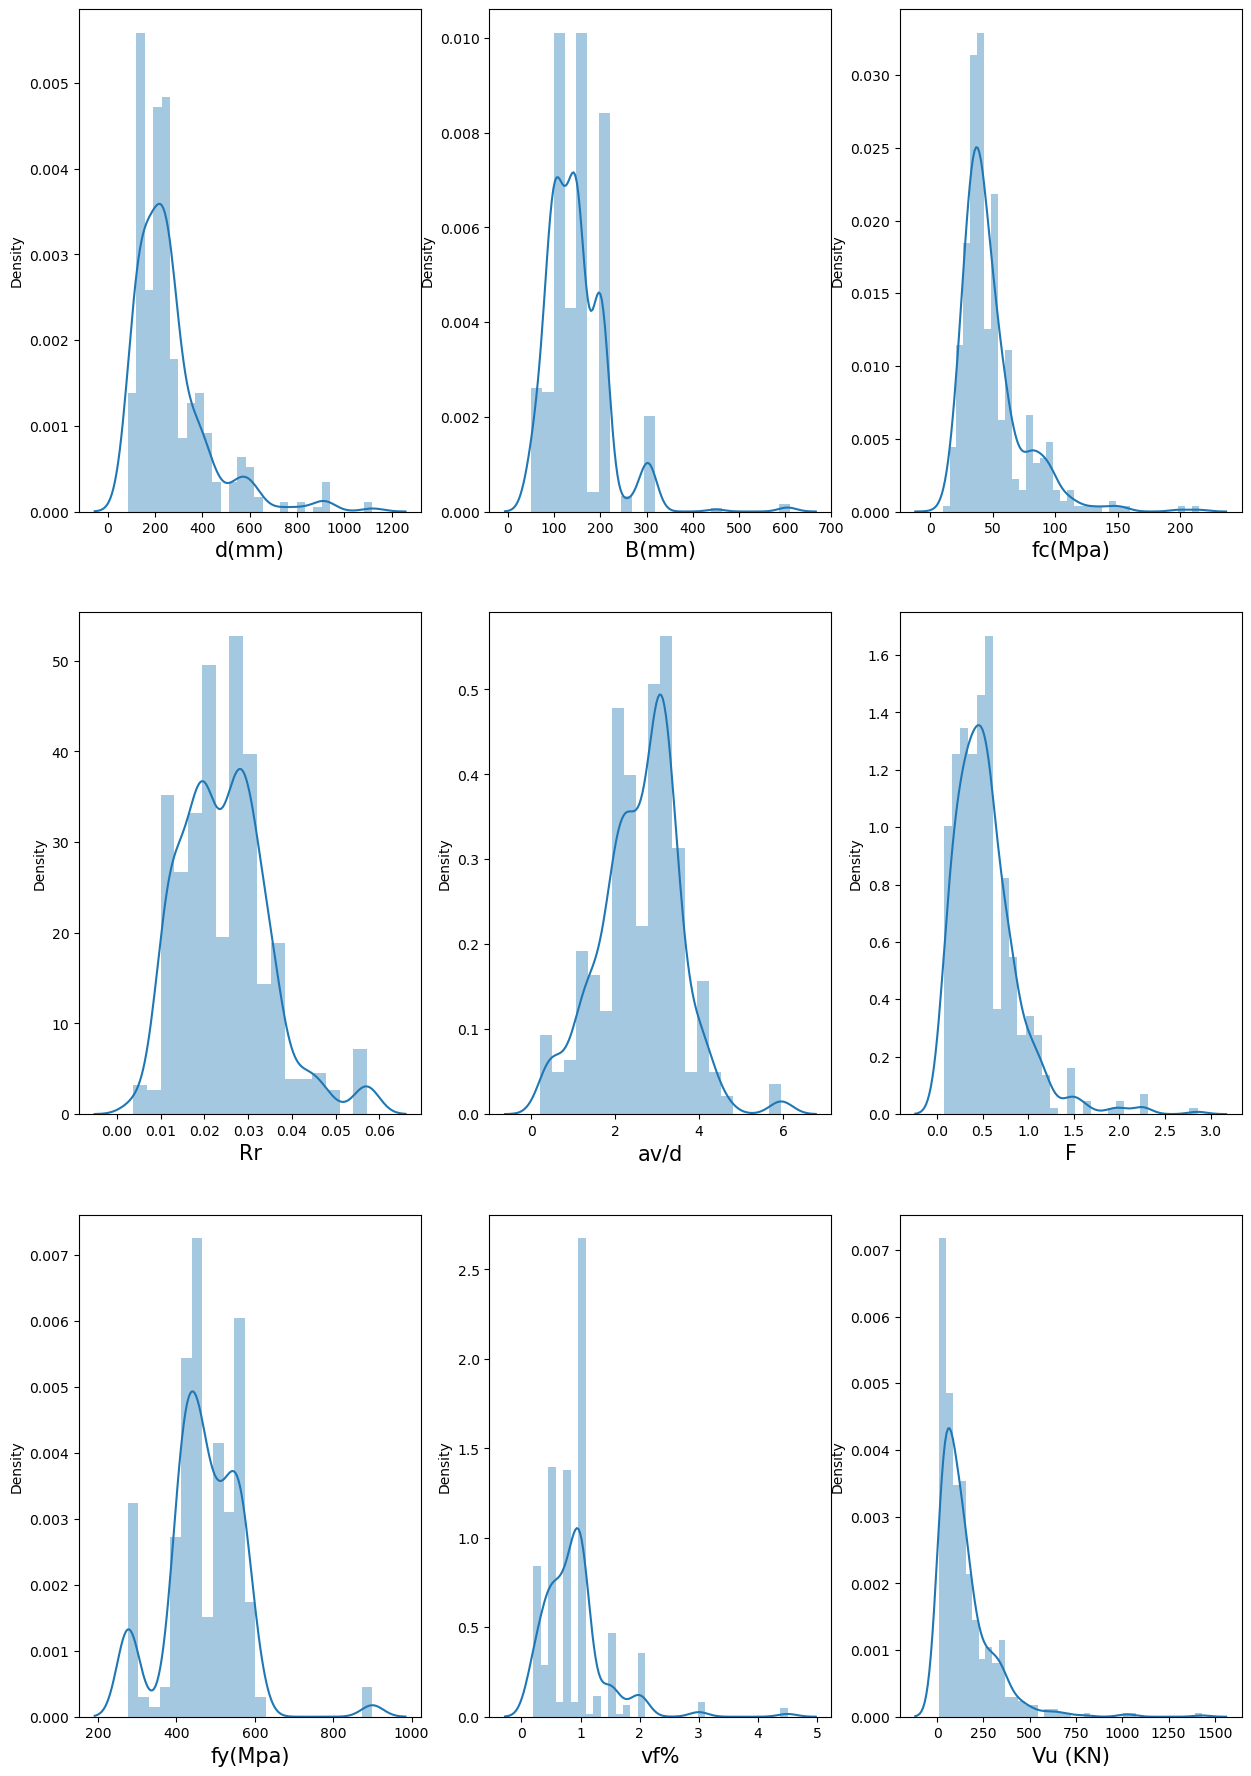

In [7]:
# Data Distribution plot
plt.figure(figsize=(15,30), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [11]:
# convert into DataFrame
data = pd.DataFrame(df)
data

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.487500,565.0,0.75,112.950000
1,251.0,150.0,25.3,0.0267,3.0876,0.487500,565.0,0.75,79.065000
2,251.0,150.0,27.9,0.0267,3.0876,0.650000,565.0,1.00,109.185000
3,251.0,150.0,26.2,0.0267,3.0876,0.650000,565.0,1.00,123.492000
4,251.0,150.0,28.1,0.0267,3.0876,0.975000,565.0,1.50,111.067500
...,...,...,...,...,...,...,...,...,...
483,300.0,200.0,215.0,0.0360,3.1667,1.090909,479.0,2.00,371.500000
484,300.0,200.0,199.0,0.0360,1.6667,1.090909,490.0,2.00,585.500000
485,266.0,120.0,31.9,0.0126,1.0902,0.075000,420.0,0.20,126.210909
486,266.0,120.0,31.9,0.0126,1.0902,0.150000,420.0,0.40,132.682909


In [12]:
#independent and target variables
X = df.drop(['Vu (KN)'], axis = 1)
y = df['Vu (KN)']
X.shape
y.shape

(488,)

In [13]:
df.describe()

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,264.202971,148.022746,48.991496,0.024563,2.604004,0.539549,470.245824,0.889170,148.364144
std,160.532443,64.874376,25.176735,0.010077,0.947298,0.359614,97.156011,0.549692,149.927020
min,85.250000,50.000000,9.770000,0.003700,0.202900,0.075000,275.862069,0.200000,12.824460
25%,159.000000,100.750000,33.220000,0.017800,2.000000,0.303000,420.000000,0.500000,47.534200
50%,222.000000,150.000000,40.750000,0.023900,2.713200,0.498750,462.000000,0.800000,108.816905
75%,300.000000,200.000000,55.075000,0.030900,3.184700,0.666094,530.000000,1.000000,190.221479
max,1118.000000,610.000000,215.000000,0.057200,5.953500,2.857500,900.000000,4.500000,1430.000000


### Scalarization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [15]:
# Train _ test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 64)

In [16]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[-0.86984685, -0.70472042, -0.63096696, ..., -1.34585351,
        -2.12848978, -1.23728219],
       [-0.04561548,  0.02342565,  0.27565572, ..., -0.88526059,
        -0.55089788,  0.20080237],
       [-0.86984685, -0.70472042, -0.3704432 , ..., -0.36917375,
        -2.12848978, -0.02044141],
       ...,
       [-0.87628615, -0.94248241, -0.2317644 , ...,  2.83863388,
         0.63388899,  2.04450051],
       [ 0.02521691, -0.42237807, -0.68387332, ..., -1.13025365,
        -0.56176749, -0.90541652],
       [-0.11000855, -0.71958055, -0.51633651, ..., -0.65222319,
        -0.56176749, -0.72104671]])

In [17]:
X_normal = (X - X.min()) / (X.max() - X.min())
X_normal

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%
0,0.160494,0.178571,0.089314,0.429907,0.501635,0.148248,0.463260,0.127907
1,0.160494,0.178571,0.075671,0.429907,0.501635,0.148248,0.463260,0.127907
2,0.160494,0.178571,0.088340,0.429907,0.501635,0.206649,0.463260,0.186047
3,0.160494,0.178571,0.080057,0.429907,0.501635,0.206649,0.463260,0.186047
4,0.160494,0.178571,0.089314,0.429907,0.501635,0.323450,0.463260,0.302326
...,...,...,...,...,...,...,...,...
483,0.207940,0.267857,1.000000,0.603738,0.515390,0.365107,0.325470,0.418605
484,0.207940,0.267857,0.922039,0.603738,0.254547,0.365107,0.343094,0.418605
485,0.175018,0.125000,0.107830,0.166355,0.154297,0.000000,0.230939,0.000000
486,0.175018,0.125000,0.107830,0.166355,0.154297,0.026954,0.230939,0.046512


### Model Devlopment

In [18]:
# Create the GradientBoostingRegressor instance

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [19]:
gbr.feature_importances_

array([0.44979279, 0.35253475, 0.07501305, 0.05520286, 0.05512224,
       0.00816282, 0.00246573, 0.00170576])

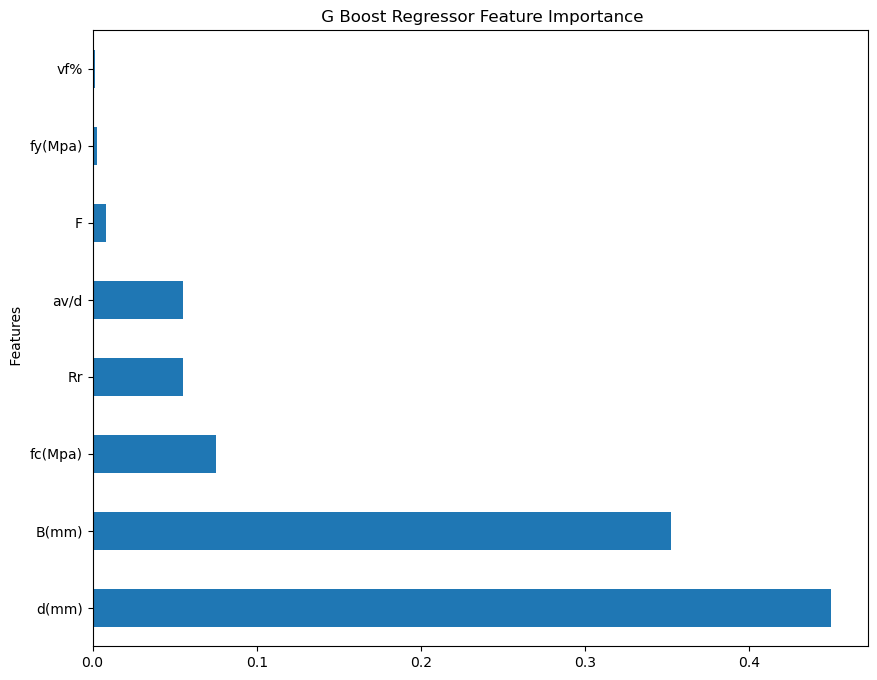

In [20]:
importances = pd.Series(gbr.feature_importances_ , index=X.columns)
plt.xlabel(" Feature Importance")
plt.ylabel(" Features")
plt.title(" G Boost Regressor Feature Importance")
importances.plot(kind = 'barh', figsize=(10,8))
plt.show()

In [21]:
# from the above feature importance graph the beam geometry and concrete compresive strength influance majourly the shear strength prediction 
#followed by longitudinal reinforcement ratio and shear span to depth ratio

### Model Evaluation

In [22]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,gbr.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,gbr.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,gbr.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,gbr.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,gbr.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,gbr.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,gbr.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,gbr.predict(X_train)))

The RMSE  on the testing dataset is:  29.599198804194533
The RMSE  on the training dataset is:  16.482056128574975
The MSE  on the testing dataset is:  876.1125698502311
The MSE  on the training dataset is:  271.65817422549594
The MAE  on the testing dataset is:  20.024182332474897
The MAE  on the training daset is:  11.811712749039415
The r2_score on the testing dataset is:  0.9643059011571776
The r2_score on the training dataset is:  0.9875953917438042


### Set up the Hyperparameter Grid for GridSearchCV

In [ ]:
# Define hyperparameter grid
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, 
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


In [18]:
# Train the model using the best parameters
optimized_gbr = GradientBoostingRegressor(**best_params, random_state=42)
optimized_gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_features='log2', n_estimators=200,
                          random_state=42, subsample=0.8)

In [19]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,optimized_gbr.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,optimized_gbr.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,optimized_gbr.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,optimized_gbr.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,optimized_gbr.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,optimized_gbr.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,optimized_gbr.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,optimized_gbr.predict(X_train)))

The RMSE  on the testing dataset is:  27.78200425407627
The RMSE  on the training dataset is:  12.414047373184006
The MSE  on the testing dataset is:  771.839760373512
The MSE  on the training dataset is:  154.10857218365672
The MAE  on the testing dataset is:  17.28752622047624
The MAE  on the training daset is:  8.898885645737613
The r2_score on the testing dataset is:  0.9685541268945587
The r2_score on the training dataset is:  0.9929630077493153


In [20]:
gbr_TEST = gbr.predict(X_test)

In [21]:
gbr_TRAIN = gbr.predict(X_train)

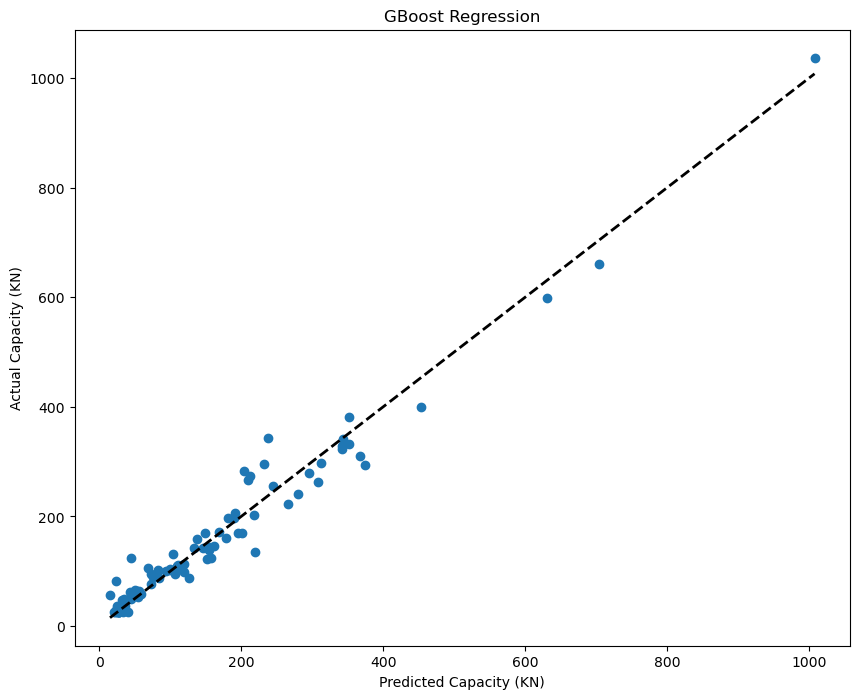

In [38]:
plt.figure(figsize=(10,8))
plt.title('GBoost Regression')
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.scatter(y_test,gbr_TEST)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

In [39]:
# Ensure X_train is a DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)

In [40]:
# Train Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:
# Check available feature names
print("Available features:", X_train.columns.tolist())


Available features: ['d(mm)', 'B(mm)', 'fc(Mpa)', 'Rr', 'av/d', 'F', 'fy(Mpa)', 'vf%']


In [42]:
# Define actual feature names
features = ["d(mm)", "B(mm)", "fc(Mpa)", "Rr", "av/d", "F", "fy(Mpa)", "vf%"]


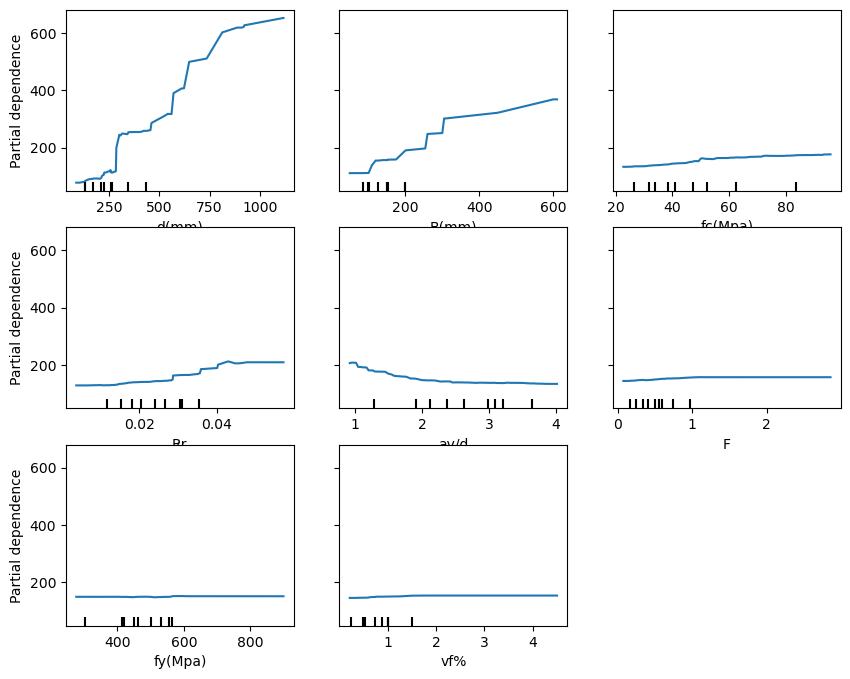

In [44]:
# Generate Partial Dependence Plots
fig, ax = plt.subplots(figsize=(10, 8))
PartialDependenceDisplay.from_estimator(rf, X_train, features, ax=ax)
plt.show()